In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils import *


In [6]:
# Define parameters
Nx = 10
Ny = 10
N = Nx * Ny
x_len = 50
y_len = 50

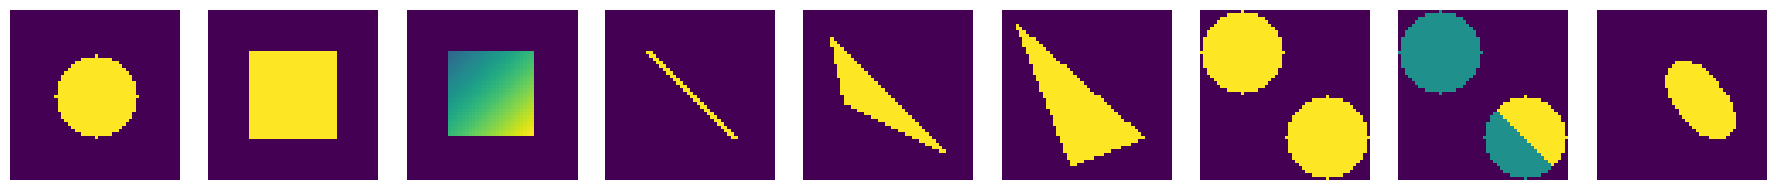

In [7]:
refs = []
imgs = []

fig,ax = plt.subplots(1,9,figsize=(18,2))
for x in ax.ravel():
    x.axis("off")

circ = cv2.circle(np.zeros((x_len,y_len)),(x_len//2,y_len//2),x_len//4,color=1,thickness=-1)
circ /= np.sum(circ)
ax[0].imshow(circ)
imgs.append(circ)
refs.append(mm_space_from_img(circ, normalize_meas=False))

rec = cv2.rectangle(np.zeros((x_len,y_len)),(x_len//4,x_len//4),(3*x_len//4,3*x_len//4),color=1,thickness=-1)
rec /= np.sum(rec)
ax[1].imshow(rec)
imgs.append(rec)
refs.append(mm_space_from_img(rec, normalize_meas=False))

rec2 = np.zeros((x_len,y_len))
for i in range(x_len//4,3*x_len//4):
    for j in range(x_len//4,3*x_len//4):
        rec2[i,j] = i+j
rec2 /= np.sum(rec2)
ax[2].imshow(rec2)
imgs.append(rec2)
refs.append(mm_space_from_img(rec2, normalize_meas=False))

tmp_pts = [(x_len//4,y_len//4),(x_len//4 + 1,y_len//4),(3*x_len//4 + 1,3*y_len//4),(3*x_len//4,3*y_len//4)]
line = cv2.fillPoly(np.zeros((x_len,y_len)), np.array([tmp_pts]), 1)
line /= np.sum(line)
ax[3].imshow(line)
imgs.append(line)
refs.append(mm_space_from_img(line, normalize_meas=False))

tmp_pts = [(x_len//4 - 4,y_len//4 - 4),(x_len//4,y_len//2+2),(3*x_len//4+4,3*y_len//4+4)]
tri = cv2.fillPoly(np.zeros((x_len,y_len)), np.array([tmp_pts]), 1)
tri /= np.sum(tri)
ax[4].imshow(tri)
imgs.append(tri)
refs.append(mm_space_from_img(tri, normalize_meas=False))

tmp_pts = [(x_len//4 - 8,y_len//4 - 8),(x_len//4+8,y_len//2+20),(3*x_len//4+4,3*y_len//4)]
tri2 = cv2.fillPoly(np.zeros((x_len,y_len)), np.array([tmp_pts]), 1)
tri2 /= np.sum(tri2)
ax[5].imshow(tri2)
imgs.append(tri2)
refs.append(mm_space_from_img(tri2, normalize_meas=False))

circ2 = cv2.circle(np.zeros((x_len,y_len)),(x_len//4,y_len//4),x_len//4,color=1,thickness=-1) + cv2.circle(np.zeros((x_len,y_len)),(3*x_len//4,3*y_len//4),x_len//4,color=1,thickness=-1)
circ2 /= np.sum(circ2)
ax[6].imshow(circ2)
imgs.append(circ2)
refs.append(mm_space_from_img(circ2, normalize_meas=False))

circ3 = np.copy(circ2)
for i in range(25,50):
    circ3[i,i:] *= 2
circ3 /= np.sum(circ3)
ax[7].imshow(circ3)
imgs.append(circ3)
refs.append(mm_space_from_img(circ3, normalize_meas=False))

ells = np.loadtxt("ellipses_data.txt").reshape((N,x_len,y_len))
m_ell = ells[28]
m_ell /= np.sum(m_ell)
ax[8].imshow(m_ell)
imgs.append(m_ell)
refs.append(mm_space_from_img(m_ell, normalize_meas=False))

plt.tight_layout()
plt.show()

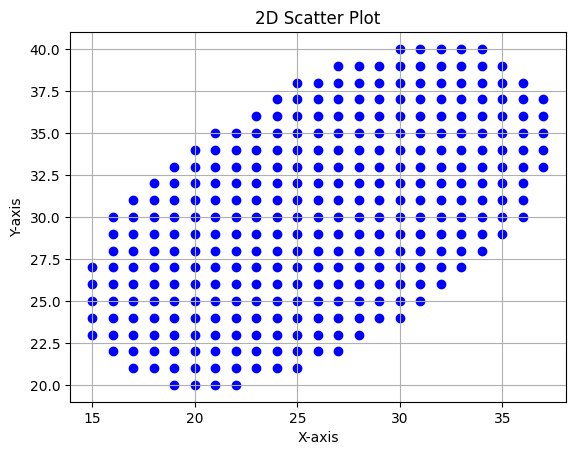

In [18]:
m_ell.shape
img=m_ell
supp = np.dstack(np.where(img > 0))[0]
height = img[supp[:,0],supp[:,1]]

# Create a scatter plot
plt.scatter(supp[:,0], supp[:,1], color='blue', marker='o')

# Adding titles and labels
plt.title('2D Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the plot
plt.grid(True)
plt.show()

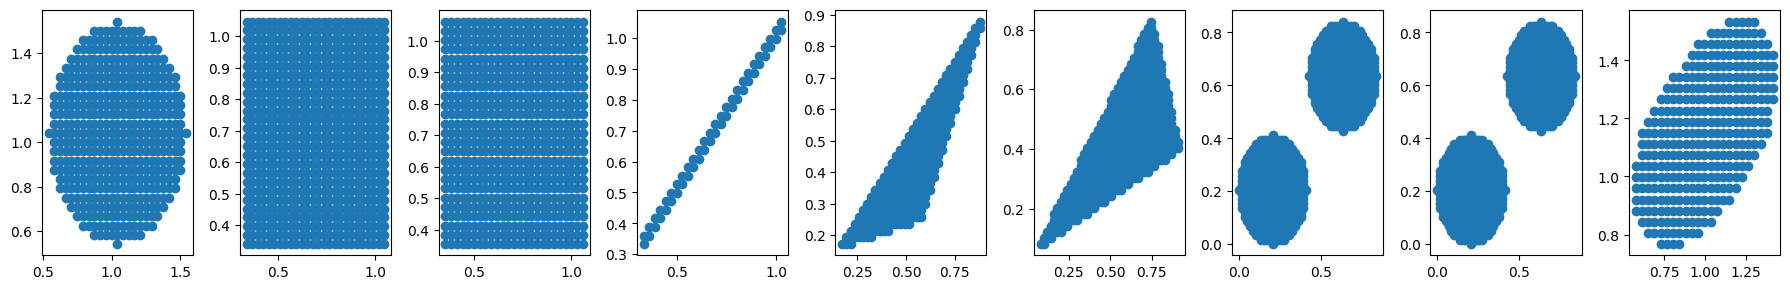

<Figure size 640x480 with 0 Axes>

In [23]:
import torch
torch.save(refs,'data/refs.pt')
torch.save(imgs,'data/refs_imgs.pt')

# Create a 9x1 subplot
fig, axes = plt.subplots(1, 9, figsize=(18, 3))

# Plotting each scatter plot in the subplots
for i, ax in enumerate(axes):
    supp,M,height=refs[i]
    M_max=M.max()
    supp=supp/M_max
    ax.scatter(supp[:, 0], supp[:, 1])
    #ax.set_title(f'Scatter Plot {i + 1}')
    #ax.grid(True)

plt.tight_layout()
plt.show()

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.show()
#plt.savefig("data/ellipse_ref.png",dpi=200)

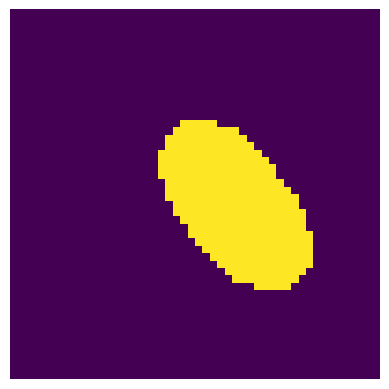

In [7]:
for i in range(9):
    plt.imshow(imgs[i])
    plt.axis("off")
    plt.savefig("./data/S_" + str(i+1),pad_inches=0,bbox_inches="tight")

In [8]:
imgs = np.array(imgs)
np.save("./data/refs.npy", imgs)
imgs.shape

(9, 50, 50)